# Reinforcement Learning Notwbook

In [1]:
from RobotEnvClass import Q_Learning, SARSA_learning, Q_Learning_Randomness
import numpy as np
import matplotlib.pyplot as plt

## Q Learning

In [2]:
q_learning = Q_Learning()
q_learning.max_episodes = 5000
q_learning.rewards={'r_time':-0.2,'r_pond':-20,'r_croissant':30,'r_cogs':30,'r_work':50}

In [3]:
%%time
Q, Rtot = q_learning.learn(1,0.8,0.9)

CPU times: user 35.4 s, sys: 586 ms, total: 35.9 s
Wall time: 35.4 s


In [4]:
q_learning.display_matrix(Q, 25)

,25,26,27,28,29,30,31,32,33,34,35
25,0.000000,66.111111,0.000000,0.000000,0.0,0.000000,66.111111,0.000000,0.000000,0.000000,0.0
26,52.688889,0.000000,32.888889,0.000000,0.0,0.000000,0.000000,82.888889,0.000000,0.000000,0.0
27,0.000000,66.111111,32.888889,41.951111,0.0,0.000000,0.000000,0.000000,66.111111,0.000000,0.0
28,0.000000,0.000000,32.888889,0.000000,39.8,0.000000,0.000000,0.000000,0.000000,52.688889,0.0
29,0.000000,0.000000,0.000000,41.951111,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,50.0
30,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,66.111111,0.000000,0.000000,0.000000,0.0
31,52.688889,0.000000,0.000000,0.000000,0.0,52.688889,0.000000,82.888889,0.000000,0.000000,0.0
32,0.000000,66.111111,0.000000,0.000000,0.0,0.000000,66.111111,0.000000,0.000000,0.000000,0.0
33,0.000000,0.000000,32.888889,0.000000,0.0,0.000000,0.000000,82.888889,0.000000,52.688889,0.0
34,0.000000,0.000000,0.000000,41.951111,0.0,0.000000,0.000000,0.000000,66.111111,0.000000,50.0


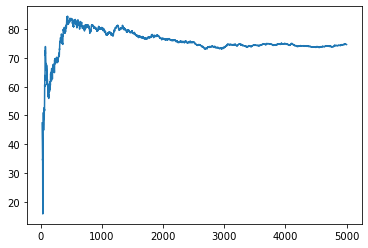

In [5]:
Rtot_avg = Rtot.cumsum() / np.arange(1, len(Rtot) + 1)
plt.plot(np.arange(20, len(Rtot_avg)), Rtot_avg[20:])

## Q Learning with some degree of randomness

In [6]:
q_learning_with_randomness = Q_Learning_Randomness()
q_learning_with_randomness.max_episodes = 5000
q_learning_with_randomness.rewards={'r_time':-0.2,'r_pond':-20,'r_croissant':30,'r_cogs':30,'r_work':50}

In [7]:
%%time
Q, Rtot = q_learning_with_randomness.learn(1,0.8,0.9)

CPU times: user 32.4 s, sys: 382 ms, total: 32.7 s
Wall time: 32.4 s


In [10]:
q_learning.display_matrix(Q, 25)

,25,26,27,28,29,30,31,32,33,34,35
25,0.0,19.8,0.0,0.0,0.0,0.0,25.4,0.0,0.0,0.0,0.0
26,19.0,0.0,0.8,0.0,0.0,0.0,0.0,50.8,0.0,0.0,0.0
27,0.0,15.8,6.4,23.0,0.0,0.0,0.0,0.0,25.4,0.0,0.0
28,0.0,0.0,0.8,0.0,27.8,0.0,0.0,0.0,0.0,27.8,0.0
29,0.0,0.0,0.0,27.0,0.0,0.0,0.0,0.0,0.0,0.0,77.2
30,0.0,0.0,0.0,0.0,0.0,0.0,19.8,0.0,0.0,0.0,0.0
31,19.0,0.0,0.0,0.0,0.0,24.6,0.0,50.8,0.0,0.0,0.0
32,0.0,21.4,0.0,0.0,0.0,0.0,25.4,0.0,0.0,0.0,0.0
33,0.0,0.0,0.8,0.0,0.0,0.0,0.0,50.8,0.0,22.2,0.0
34,0.0,0.0,0.0,17.4,0.0,0.0,0.0,0.0,27.0,0.0,77.2


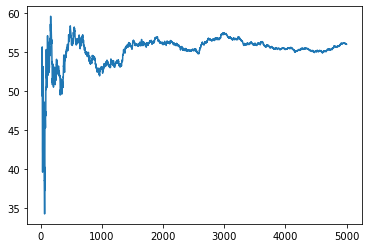

In [11]:
Rtot_avg = Rtot.cumsum() / np.arange(1, len(Rtot) + 1)
plt.plot(np.arange(20, len(Rtot_avg)), Rtot_avg[20:])

## SARSA algorithm

In [12]:
sarsa_learning = SARSA_learning()
sarsa_learning.max_episodes = 5000
sarsa_learning.rewards={'r_time':-0.2,'r_pond':-20,'r_croissant':30,'r_cogs':30,'r_work':50}

In [13]:
%%time
Q, Rtot = sarsa_learning.learn(1,0.8,0.9)

CPU times: user 49.5 s, sys: 657 ms, total: 50.2 s
Wall time: 49.6 s


In [14]:
sarsa_learning.display_matrix(Q, 25)

,25,26,27,28,29,30,31,32,33,34,35
25,0.000000,-6.331060,0.000000,0.000000,0.000000,0.000000,38.743461,0.000000,0.0000,0.00000,0.0
26,-1.146109,0.000000,10.994769,0.000000,0.000000,0.000000,0.000000,48.679327,0.0000,0.00000,0.0
27,0.000000,38.743461,-4.088320,-2.115037,0.000000,0.000000,0.000000,0.000000,19.8896,0.00000,0.0
28,0.000000,0.000000,-26.626896,0.000000,-14.300902,0.000000,0.000000,0.000000,0.0000,15.71168,0.0
29,0.000000,0.000000,0.000000,-17.626128,0.000000,0.000000,0.000000,0.000000,0.0000,0.00000,50.0
30,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.086564,0.000000,0.0000,0.00000,0.0
31,18.259288,0.000000,0.000000,0.000000,0.000000,7.858205,0.000000,31.522125,0.0000,0.00000,0.0
32,0.000000,-18.816525,0.000000,0.000000,0.000000,0.000000,14.407430,0.000000,0.0000,0.00000,0.0
33,0.000000,0.000000,5.312000,0.000000,0.000000,0.000000,0.000000,28.872353,0.0000,15.71168,0.0
34,0.000000,0.000000,0.000000,-26.978325,0.000000,0.000000,0.000000,0.000000,19.8896,0.00000,50.0


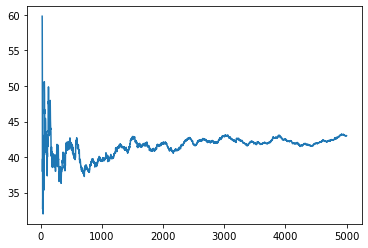

In [15]:
Rtot_avg = Rtot.cumsum() / np.arange(1, len(Rtot) + 1)
plt.plot(np.arange(20, len(Rtot_avg)), Rtot_avg[20:])

## Playing with some params

In [7]:
alpha_list = [0.9, 0.6, 0.3]
gamma_list = [0.9, 0.6, 0.3]
R_alpha_list = []
R_gamma_list = []
colors= ['r', 'b', 'g']

In [8]:
robotEnv = Q_Learning()
robotEnv.max_episodes = 5000
robotEnv.rewards={'r_time':-0.2,'r_pond':-20,'r_croissant':30,'r_cogs':30,'r_work':50}

In [9]:
for alpha in alpha_list:
    print(alpha)

0.9
0.6
0.3


In [10]:
for alpha in alpha_list:
    Q, Rtot = robotEnv.Q_learning(alpha,0.9,0.9)
    #print(Rtot)
    R_alpha_list.append(Rtot)

In [11]:
for gamma in gamma_list:
    Q, Rtot = robotEnv.Q_learning(0.9,gamma,0.9)
    #print(Rtot)
    R_gamma_list.append(Rtot)

In [12]:
R_alpha_list

[array([ 36.2, -20.2,  90.8, ..., 127. ,  62.6, -22.4]),
 array([ 178.6,  232. ,  354. , ..., -125.8,  133. ,   85.4]),
 array([ 12.6, 401.2,  30.6, ...,  40. ,  24.4, 265.4])]

In [13]:
R_gamma_list

[array([-120.2,  184.2,  274. , ...,  772.4,  -60.4,  233.8]),
 array([-13.2,  40.2,  11.2, ...,  36.8, 199.6, -10.6]),
 array([717. , 237.2, -82.4, ...,  47.4, 290.4,  47.4])]

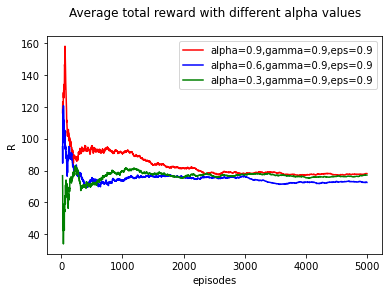

In [14]:
for i in range(len(alpha_list)):
    Rtot = R_alpha_list[i]
    Rtot_avg = Rtot.cumsum() / np.arange(1, len(Rtot) + 1)
    plt.plot(np.arange(20, len(Rtot_avg)), Rtot_avg[20:], colors[i], label=f'alpha={alpha_list[i]},gamma=0.9,eps=0.9')
    plt.legend(loc="upper right")
    
plt.xlabel('episodes')
plt.ylabel('R')
plt.title('Average total reward with different alpha values', fontsize=12, pad=20)
plt.show()

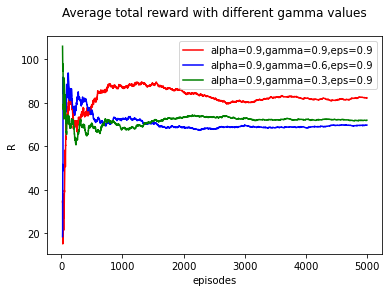

In [15]:
for i in range(len(gamma_list)):
    Rtot = R_gamma_list[i]
    Rtot_avg = Rtot.cumsum() / np.arange(1, len(Rtot) + 1)
    plt.plot(np.arange(20, len(Rtot_avg)), Rtot_avg[20:], colors[i], label=f'alpha=0.9,gamma={gamma_list[i]},eps=0.9')
    plt.legend(loc="upper right")


plt.xlabel('episodes')
plt.ylabel('R')    
plt.title('Average total reward with different gamma values', fontsize=12, pad=20)
plt.show()